<a href="https://colab.research.google.com/github/Larr014/DataMining/blob/master/TextMining_Red_Neuronal_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('/content/corona_fake.csv')
df

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


In [15]:
df['text'][0]

'You just need to add water, and the drugs and vaccines are ready to be administered. There are two parts to the kit: one holds pellets containing the chemical machinery that synthesises the end product, and the other holds pellets containing instructions that telll the drug which compound to create. Mix two parts together in a chosen combination, add water, and the treatment is ready.'

In [16]:
df['title'] = df['title'].fillna("")
df['text'] = df['text'].fillna("")
df

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


In [17]:
df['label'].unique()

array(['Fake', nan, 'TRUE', 'fake'], dtype=object)

In [18]:
df = df.dropna()
df['label'] = df['label'].str.capitalize()
df['label'].unique()

<ipython-input-18-35530f877ef7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].str.capitalize()


array(['Fake', 'True'], dtype=object)

In [19]:
df.reset_index(inplace=True) #REiniciar los index
df

,index,title,text,source,label
0,0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...,...
1137,1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,True
1138,1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,True
1139,1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,True
1140,1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,True


In [20]:
df['labelInt']=pd.Categorical(df['label']).codes
df

<ipython-input-20-0470bb07072e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labelInt']=pd.Categorical(df['label']).codes


,index,title,text,source,label,labelInt
0,0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,0
1,1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake,0
2,2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake,0
3,3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake,0
4,4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake,0
...,...,...,...,...,...,...
1137,1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,True,1
1138,1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,True,1
1139,1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,True,1
1140,1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,True,1


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
feature_names = vectorizer.get_feature_names_out()
dense_frec = X.todense()
denselist_frec = dense_frec.tolist()
df_n = pd.DataFrame(denselist_frec, columns=feature_names)
df_n.head() #muestra las primeras 5

,00,000,00000073,000073,0002,000km,000mg,000th,001,003,...,zvezda,zxc21,zygmunt,µg,ávila,être,κb,μg,μm,方啟泰
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_n, df['labelInt'],
                                                    test_size=0.2, random_state=6#42
                                                    )

In [28]:
X_train

,00,000,00000073,000073,0002,000km,000mg,000th,001,003,...,zvezda,zxc21,zygmunt,µg,ávila,être,κb,μg,μm,方啟泰
670,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,0.0,0.010642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,0.0,0.017736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,0.0,0.007590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,0.0,0.022895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
713,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array(X_train.to_numpy(), "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array(y_train, "float32")

model = Sequential()
model.add(Dense(16, input_dim=21947, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=100)

# evaluamos el modelo
#y_pred = model.evaluate(training_data, target_data)
y_pred1 =  model.predict(X_test.to_numpy())

Epoch 1/100
29/29 [==============================] - 1s 14ms/step - loss: 0.2382 - binary_accuracy: 0.6594
Epoch 2/100
29/29 [==============================] - 0s 17ms/step - loss: 0.1952 - binary_accuracy: 0.9321
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 0.1483 - binary_accuracy: 0.9726
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1089 - binary_accuracy: 0.9803
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0797 - binary_accuracy: 0.9858
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0595 - binary_accuracy: 0.9912
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0450 - binary_accuracy: 0.9956
Epoch 8/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0344 - binary_accuracy: 0.9967
Epoch 9/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0270 - binary_accuracy: 0.9978
Epoch 10/100
29/29 [========================

In [39]:
y_pred = y_pred1.round()

acc: 0.9170305676855895
precision: 0.9196124031007752
recall: 0.9146621725141719
f1: 0.9170305676855895


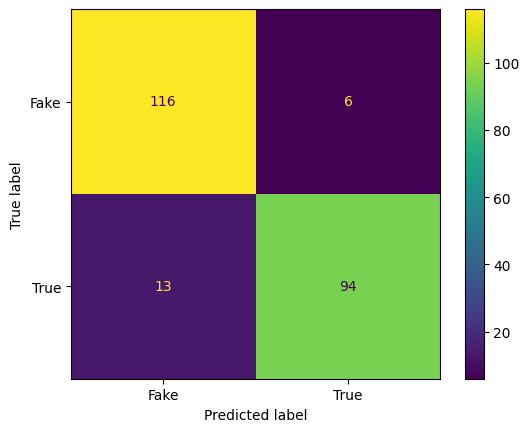

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Fake',"True"]
 #['Sobrevive','No Sobrevive']
                                           ).plot(values_format='d')
